In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image

plt.style.use('seaborn')
sns.set(font_scale=2.5)

In [3]:
dt1 = pd.read_csv('gender_submission.csv')
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

survival - 생존유무, target 값. (0 = 사망, 1 = 생존)   
pclass   - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)   
sex      - 성별   
Age      - 나이(세)   
sibsp    - 함께 탑승한 형제자매, 배우자 수 총합   
parch    - 함께 탑승한 부모, 자녀 수 총합   
ticket   - 티켓 넘버   
fare     - 탑승 요금   
cabin    - 객실 넘버   
embarked - 탑승 항구

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


+ Sex, Cabin, Embarked 에 빈데이터 존재   
+ PassengerId, Name 은 생존과 연관성을 찾기 어렵다고 판단


In [7]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Pclass는 1등석, 2등석, 3등석의 정보   
비어있는 데이터는 없음   
분포를 알아보기 위해 시각화

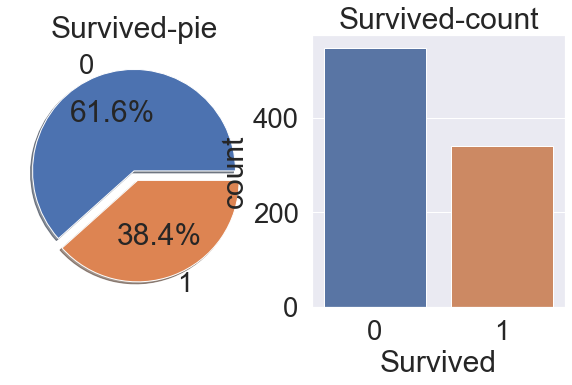

In [8]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
train_data['Survived'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Survived-pie')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train_data, ax=ax[1])
ax[1].set_title('Survived-count')
plt.show()

In [9]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar', stacked=True, figsize=(10,5))

생존자, 사망자를 feature 별로 나누어 그래프로 확인하는 함수

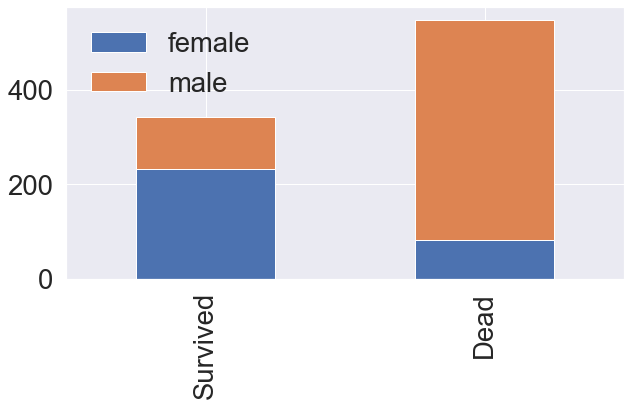

In [10]:
bar_chart('Sex')

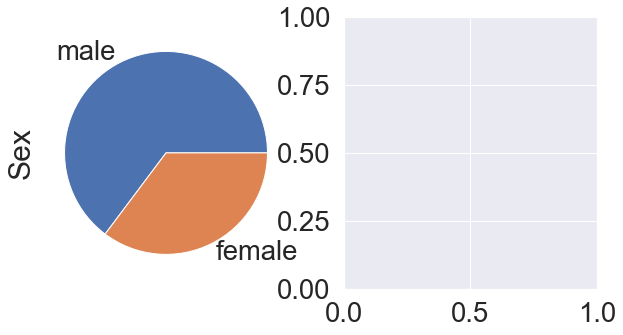

In [11]:
f, ax = plt.subplots(1,2, figsize=(10,5))
train_data['Sex'].value_counts().plot.pie(ax=ax[0])

여자는 상대적으로 많이 살아남았지만 남자는 많이 죽은 것을 알 수 있다

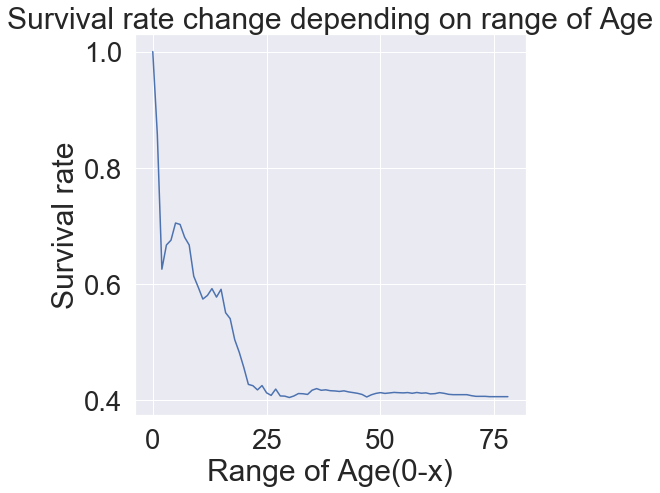

In [12]:
change_age_range_survival_ratio = []

for i in range(1,80):
    change_age_range_survival_ratio.append(train_data[train_data['Age'] < i]['Survived'].sum() / len(train_data[train_data['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

나이가 어릴수록 생존확률이 높은 것을 알 수 있음

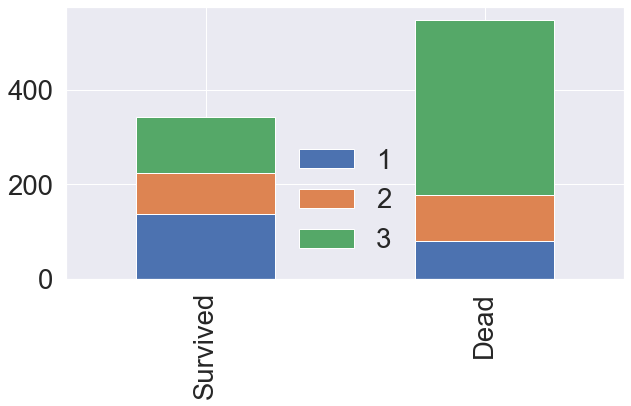

In [13]:
bar_chart('Pclass')

3등석이 상대적으로 많이 죽은 것을 확인할 수 있다

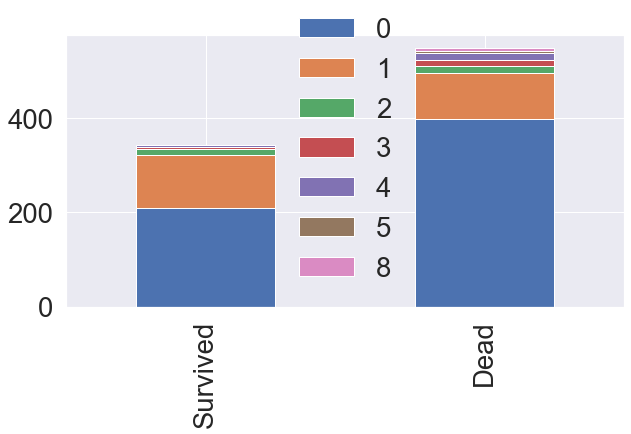

In [14]:
bar_chart('SibSp')

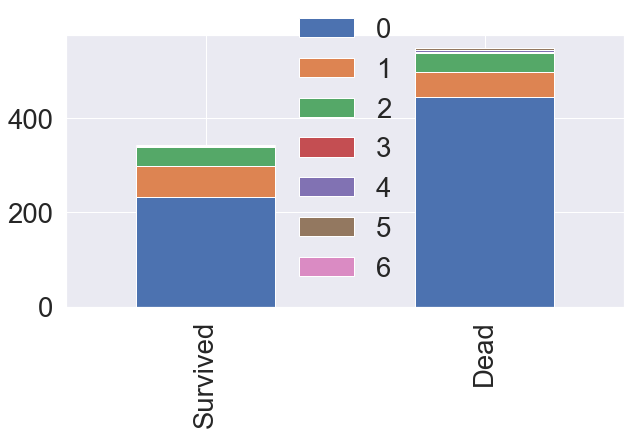

In [15]:
bar_chart('Parch')

위 2개의 그래프를 살펴보면 혼자 탔을 때 사망한 경우가 유의미하게 많은 것을 확인할 수 있음

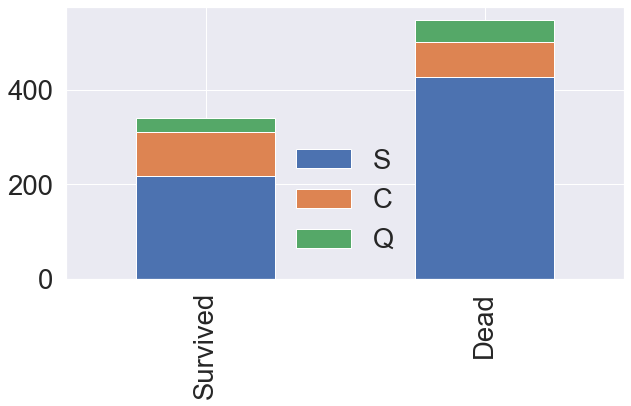

In [16]:
bar_chart('Embarked')

탑승 항구가 S인 경우 사망자가 더 많은 것을 확인

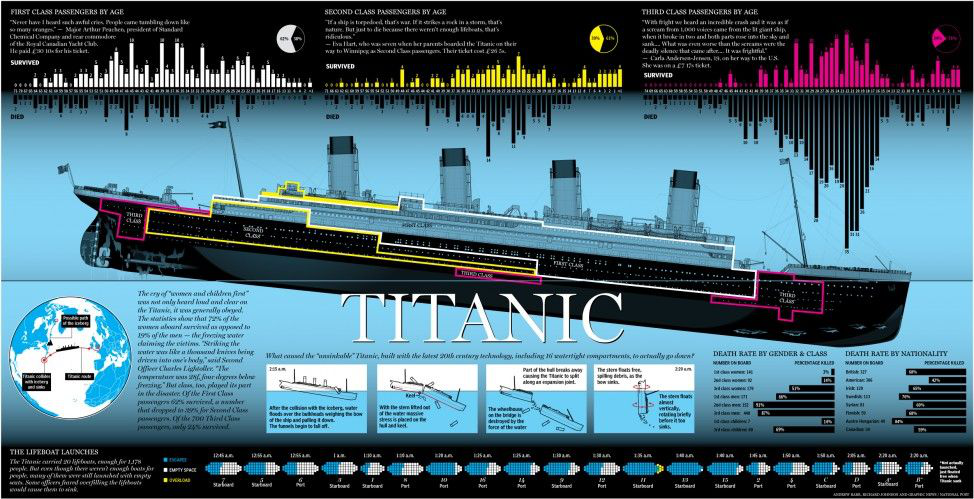

In [17]:
Image.open('titanic.jpg')

타이타닉호의 내부 구조를 보면 3등석이 양쪽에 존재하고 중간쪽엔 2등석 위쪽이 1등석인 것을 확인할 수 있음. 또한, 가라앉는 부분을 보면 우측 3등석이 먼저 물에 잠기는 것을 확인 할 수 있다.

# Name

In [18]:
train_test_data = [train_data, test_data]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


데이터 Name에서 유의미한 정보만 추출

In [20]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Sir           1
Ms            1
Countess      1
Lady          1
Mme           1
Don           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

In [21]:
title_mapping = {"Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Dr" : 4, "Rev": 4, "Col": 0, "Major": 0, "Mlle": 1,"Countess": 0,
                 "Ms": 2, "Lady": 2, "Jonkheer": 0, "Don": 0, "Dona" : 2, "Mme": 2,"Capt": 0,"Sir": 0}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)    

크게 Mr, Miss, Mrs과 나머지(Ohters)로 분류   
Mr     -> 0 (성인 남자)     
Miss   -> 1 (12세 미만 여자아이)   
Mrs    -> 2 (성인 여자)   
Master -> 3 (결혼을 하지 않은 남성, 주로 청소년 이하)   
Ohters -> 4

In [22]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
train_data.drop('Name', axis = 1, inplace=True)
test_data.drop('Name', axis = 1, inplace=True)

In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


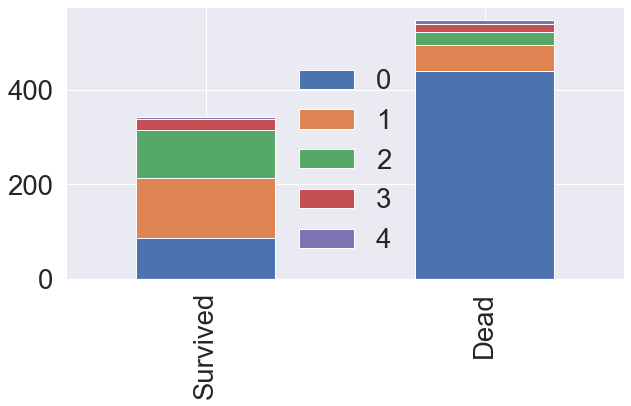

In [26]:
bar_chart('Title')

그래프를 보면 성인 남자의 사망자 수가 많은 것을 알 수 있다

# Sex

In [27]:
sex_mapping = {"male" : 0, "female" : 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

male -> 0   
female -> 1

In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


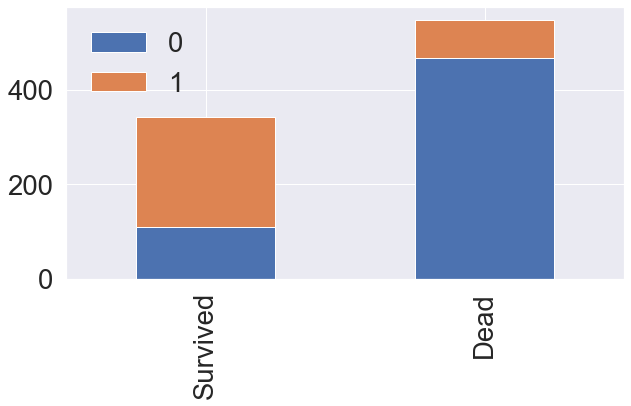

In [29]:
bar_chart('Sex')

상대적으로 여자보다 남자가 사망자 수가 많은 것을 알 수 있음

# Age

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


Age에는 결측값이 존재하므로 결측값을 처리해야함

In [31]:
train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"), inplace=True)
test_data["Age"].fillna(test_data.groupby("Title")["Age"].transform("median"), inplace=True)

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


### 나이별 생존, 사망자수 지표

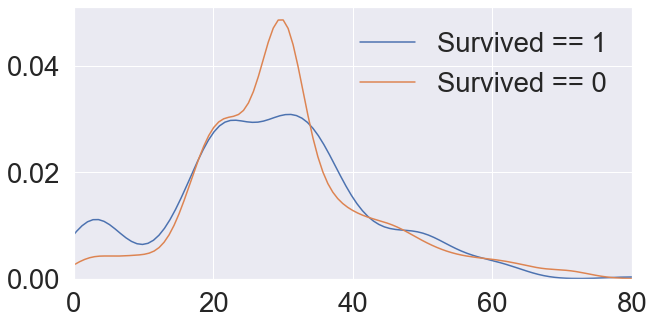

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Age'], ax=ax)
ax.set(xlim=(0, train_data['Age'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.show()

### 0~20세

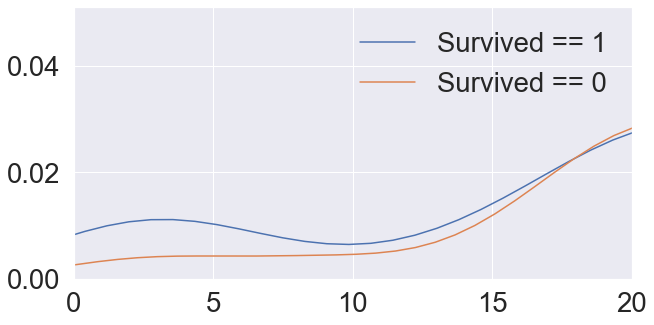

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Age'], ax=ax)
ax.set(xlim=(0, train_data['Age'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.xlim(0, 20)
plt.show()

### 20~40세

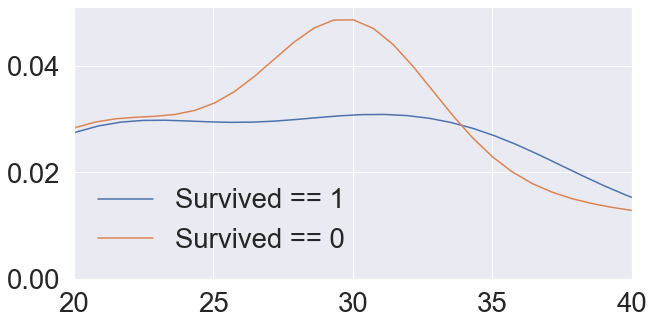

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Age'], ax=ax)
ax.set(xlim=(0, train_data['Age'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.xlim(20, 40)
plt.show()

### 40~60세

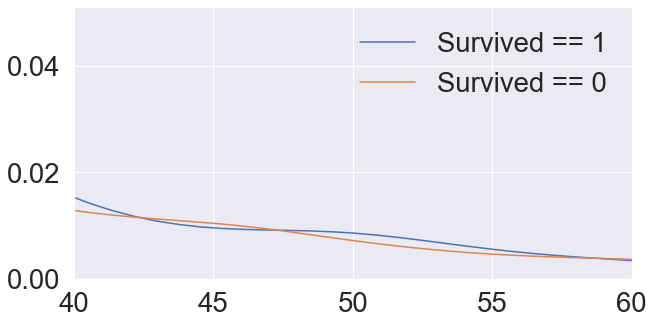

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Age'], ax=ax)
ax.set(xlim=(0, train_data['Age'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.xlim(40, 60)
plt.show()

### 60~80세

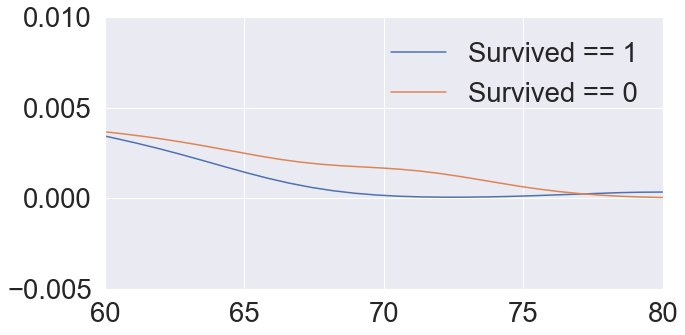

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Age'], ax=ax)
ax.set(xlim=(0, train_data['Age'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.xlim(60, 80)
plt.ylim(-0.005, 0.01)
plt.show()

In [38]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4,
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5,
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'Age'] = 6,
    dataset.loc[ dataset['Age'] > 70, 'Age'] = 7

In [39]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,S,0


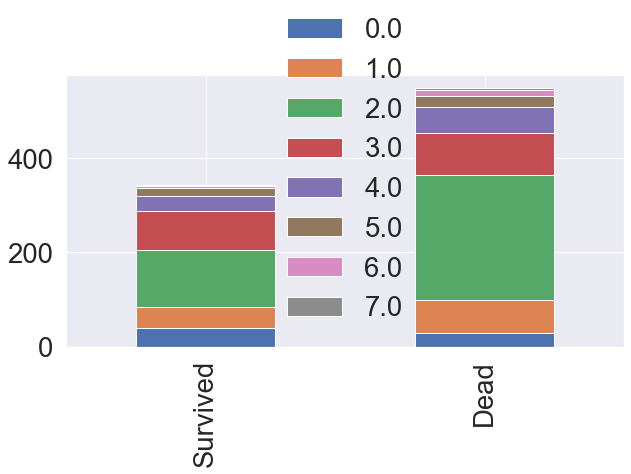

In [40]:
bar_chart('Age')

# Embarked

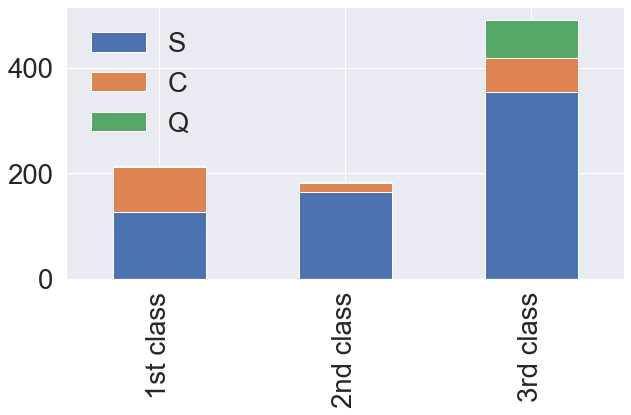

In [41]:
Pclass1 = train_data[train_data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

2등석과 3등석은 대부분 S항구에서 많이 탄다고 볼 수 있음   
1등석은 C항구와 S항구에서 많이 타지만 과반수는 S항구   
그러므로 결측값을 S로 채워도 된다고 판단

In [42]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [43]:
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
embarked_mapping = {'S' : 0, 'C' : 1, 'Q' : 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [45]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,0,0


# Fare

가격표는 Pclass에 영향 받는다고 판단해 Pclass 별 중간값으로 결측값을 처리

In [46]:
train_data['Fare'].fillna(train_data.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test_data['Fare'].fillna(test_data.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [47]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


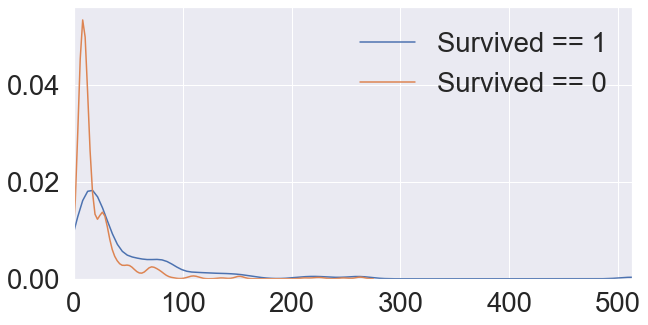

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Fare'], ax=ax)
ax.set(xlim=(0, train_data['Fare'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.show()

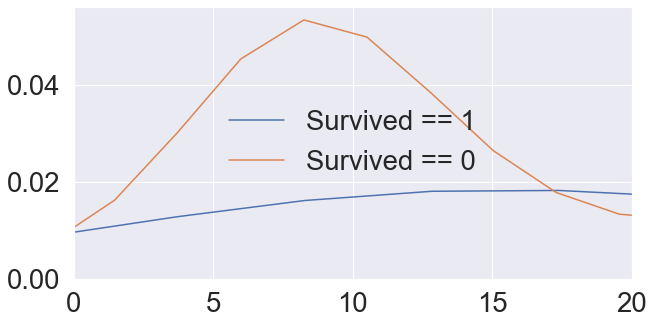

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Fare'], ax=ax)
ax.set(xlim=(0, train_data['Fare'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.xlim(0,20)
plt.show()

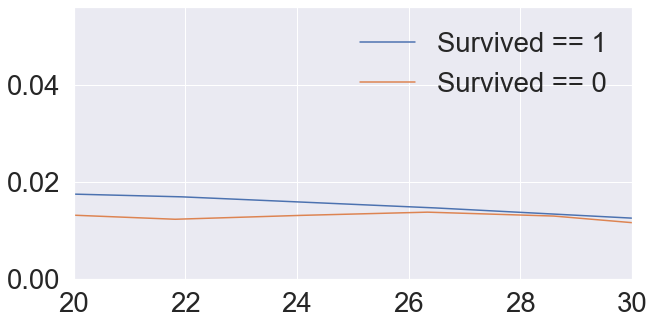

In [50]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Fare'], ax=ax)
ax.set(xlim=(0, train_data['Fare'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.xlim(20,30)
plt.show()

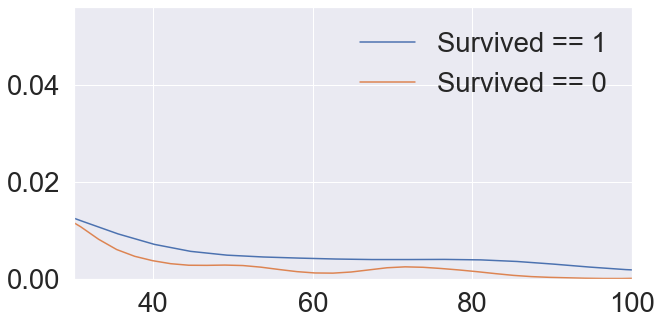

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Fare'], ax=ax)
ax.set(xlim=(0, train_data['Fare'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.xlim(30,100)
plt.show()

0-20 -> 0   
21-30 -> 1   
31-100 -> 2   
100- -> 3

In [52]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 20, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,3.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,3.0,0,0,373450,0.0,NaN,0,0


# Cabin

In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [55]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

cabin은 결측값이 너무 많으므로 포함하지 않음

# SibSp, Parch

이 두가지 feature를 하나로 묶는 이유는 혼자 탔을 때와 두명 이상이 탔을 때의 사망률이 유의미하게 차이나기 때문

In [56]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

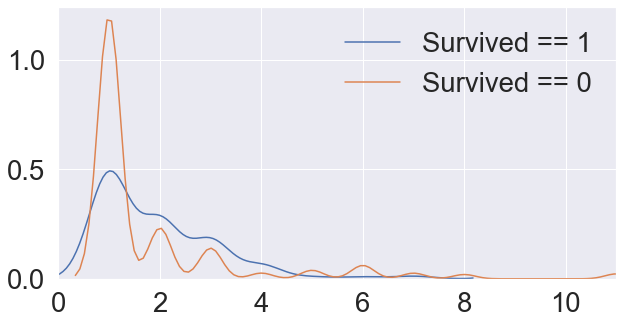

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['FamilySize'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['FamilySize'], ax=ax)
ax.set(xlim=(0, train_data['FamilySize'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.show()

In [58]:
family_mapping = {1: 0, 2: 0.5, 3: 1, 4: 1.5, 5: 2, 6: 2.5, 7: 3, 8: 3.5, 9: 4, 10: 4.5, 11: 5}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [59]:
train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,2.0,1,0,A/5 21171,0.0,NaN,0,0,0.5
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2,0.5
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1,0.0
3,4,1,1,1,3.0,1,0,113803,2.0,C123,0,2,0.5
4,5,0,3,0,3.0,0,0,373450,0.0,NaN,0,0,0.0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0,0.0
6,7,0,1,0,5.0,0,0,17463,2.0,E46,0,0,0.0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3,2.0
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2,1.0
9,10,1,2,1,1.0,1,0,237736,2.0,NaN,1,2,0.5


## 필요없는 feature를 삭제

In [60]:
features_drop = ['Ticket', 'Cabin', 'SibSp', 'Parch']
train_data = train_data.drop(features_drop, axis=1)
test_data = test_data.drop(features_drop, axis=1)
train_data = train_data.drop(['PassengerId'], axis=1)

In [61]:
test_data = test_data.drop(['PassengerId'], axis=1)

In [62]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,2.0,0.0,0,0,0.5
1,1,1,1,3.0,2.0,1,2,0.5
2,1,3,1,2.0,0.0,0,1,0.0
3,1,1,1,3.0,2.0,0,2,0.5
4,0,3,0,3.0,0.0,0,0,0.0


In [63]:
# target = train_data['Survived']
# train_data = train_data.drop(['Survived'], axis=1)

In [64]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,2.0,0.0,0,0,0.5
1,1,1,1,3.0,2.0,1,2,0.5
2,1,3,1,2.0,0.0,0,1,0.0
3,1,1,1,3.0,2.0,0,2,0.5
4,0,3,0,3.0,0.0,0,0,0.0


one-hot-encoding

In [65]:
train_data = pd.get_dummies(train_data, columns=['Title'], prefix='Title')
test_data = pd.get_dummies(test_data, columns=['Title'], prefix='Title')

In [66]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title_0,Title_1,Title_2,Title_3,Title_4
0,0,3,0,2.0,0.0,0,0.5,1,0,0,0,0
1,1,1,1,3.0,2.0,1,0.5,0,0,1,0,0
2,1,3,1,2.0,0.0,0,0.0,0,1,0,0,0
3,1,1,1,3.0,2.0,0,0.5,0,0,1,0,0
4,0,3,0,3.0,0.0,0,0.0,1,0,0,0,0


In [67]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title_0,Title_1,Title_2,Title_3,Title_4
0,3,0,3.0,0.0,2,0.0,1,0,0,0,0
1,3,1,4.0,0.0,0,0.5,0,0,1,0,0
2,2,0,6.0,0.0,2,0.0,1,0,0,0,0
3,3,0,2.0,0.0,0,0.0,1,0,0,0,0
4,3,1,2.0,0.0,0,1.0,0,0,1,0,0


# Modelling

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [69]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   FamilySize  891 non-null    float64
 7   Title_0     891 non-null    uint8  
 8   Title_1     891 non-null    uint8  
 9   Title_2     891 non-null    uint8  
 10  Title_3     891 non-null    uint8  
 11  Title_4     891 non-null    uint8  
dtypes: float64(3), int64(4), uint8(5)
memory usage: 53.2 KB


## Cross Validation (K-fold)

In [70]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

train, validation 분리

In [71]:
X_train = train_data.drop('Survived', axis=1).values
target_label = train_data['Survived'].values
X_test = test_data.values

In [72]:
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label, test_size=0.3, random_state=2020)

## kNN

In [73]:
# clf = KNeighborsClassifier(n_neighbors=13)
# scoring = 'accuracy'
# score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [74]:
# print(score)

kNN Score

In [75]:
# round(np.mean(score)*100, 2)

In [76]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_tr, y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [77]:
prediction = knn.predict(X_vid)

In [78]:
prediction

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1], dtype=int64)

In [79]:
(prediction == y_vid).sum() / prediction.shape[0]

0.7947761194029851

In [80]:
acc_knn = round(knn.score(X_tr, y_tr) * 100, 2)
acc_knn

83.79

## Decision Tree

In [81]:
# clf = DecisionTreeClassifier()
# scoring = 'accuracy'
# score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [82]:
# print(score)

decision tree Score

In [83]:
# round(np.mean(score)*100, 2)

In [84]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_tr, y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
prediction = model_DT.predict(X_vid)

In [86]:
prediction

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1], dtype=int64)

In [87]:
(prediction == y_vid).sum() / prediction.shape[0]

0.7910447761194029

In [88]:
acc_model_DT = round(model_DT.score(X_tr, y_tr) * 100, 2)
acc_model_DT

89.41

## Random Forest

In [89]:
# clf = RandomForestClassifier(n_estimators=13)
# scoring = 'accuracy'
# score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
# print(score)

Random Forest Score

In [90]:
# round(np.mean(score)*100, 2)

In [91]:
model_RF = RandomForestClassifier()
model_RF.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
prediction_3 = model_RF.predict(X_vid)

In [93]:
(prediction_3 == y_vid).sum() / prediction_3.shape[0]

0.7947761194029851

In [94]:
acc_model_RF = round(model_RF.score(X_tr, y_tr) * 100, 2)
acc_model_RF

89.41

In [95]:
from pandas import Series

In [96]:
feature_importance = model_RF.feature_importances_
Series_feat_imp = Series(feature_importance, index=test_data.columns)

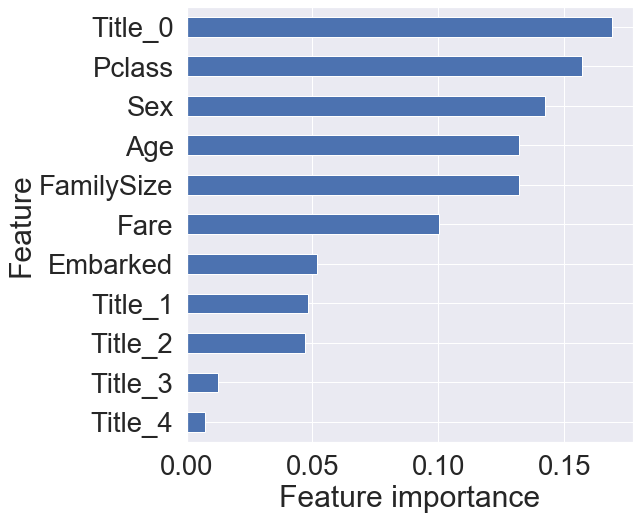

In [97]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## Naive Bayes

In [98]:
# clf = GaussianNB()
# scoring = 'accuracy'
# score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
# print(score)

Naive Bayes Score

In [99]:
# round(np.mean(score)*100, 2)

In [100]:
model_NB = GaussianNB()
model_NB.fit(X_tr, y_tr)

GaussianNB(priors=None, var_smoothing=1e-09)

In [101]:
acc_model_NB = round(model_NB.score(X_tr, y_tr) * 100, 2)
acc_model_NB

80.26

## SVM

In [102]:
# clf = SVC()
# scoring = 'accuracy'
# score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
# print(score)

SVM score

In [103]:
# round(np.mean(score)*100, 2)

In [104]:
model_SVM = SVC()
model_SVM.fit(X_tr, y_tr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [105]:
acc_model_SVM = round(model_SVM.score(X_tr, y_tr) * 100 , 2)
acc_model_SVM

83.47

## Testing

kNN이 81.93으로 가장 높은 score를 기록 했으므로 kNN사용

In [106]:
# clf = KNeighborsClassifier(n_neighbors=13)
# clf.fit(train_data, target)

# test_data_copy = test_data.drop("PassengerId", axis=1).copy()
# prediction = clf.predict(test_data_copy)

In [107]:
# submission = pd.DataFrame({
#     "PassengerId" : test_data["PassengerId"], "Survived" : prediction
# })
# submission.to_csv('submission.csv', index=False)

In [108]:
# submission = pd.read_csv('submission.csv')
# submission.head()

public score    
0.76315로 상당히 낮게 나옴   
개선할 점 찾아야함

---------------------------------------개선

In [109]:
# submission = pd.read_csv('gender_submission.csv')

In [110]:
# prediction = model_RF.predict(X_test)

In [111]:
# prediction

In [112]:
# submission['Survived'] = prediction

In [113]:
# submission.to_csv('submission2.csv',index=False)

0.76315